# COGS 108 - Final Project

# Name & GitHub ID

- Name: **Jitarth Sheth**
- GitHub Username: [**jshethbright**](https://github.com/jshethbright)

# Overview

In this analysis, I attempted to determine the relationship between percentage of households with median household income below \\$35,000, park accessibility, and park quality within cities in San Diego County. Initially, I found a negative correlation between median income and park accessibility, as well as median income and park quality. I also observed a positive correlation between park accessibility and park quality. However, the overall relationship between the variables is inconclusive due to a low final observation size and needs future analysis.

# Research Question

What is the relationship between percentage of households with median household income below $35,000, park accessibility, and park quality within cities in San Diego County?

## Background and Prior Work

Parks are a crucial component of improving public health and fostering a sense of community. They provide numerous benefits ranging from improving communty fitness by encouraging exercise to mitigating climate change through the creation of green zones within cities.<sup>3</sup> However, not all parks are created equal. Many parks lack various amenities caused by a scarcity of funding, which can reduce foot traffic to these parks and reduce their positive effectiveness. Specifically, in San Diego, park amenity and funding greatly vary between communities and cities.<sup>1</sup> 

According to a study on neighborhood income and disparities in facilities, cities and communities with lower median income are more likely to have parks with lower quality facilities and amenities than those with higher incomes.<sup>2</sup> In low-income communities, there is also higher incidence rate for childhood obesity, leading to a greater importance of parks in improving health and fitness.<sup>4</sup>

Prior research has been conducted in the Thoman L et al.<sup>2</sup> and Megan et al.<sup>5</sup> studies looking at the lack of park facilities in low-income neighborhoods, however, these studies only look at low-income communities and do not look at whether there is a correlation between median income and park availability and quality. My research question would provide greater insight into these possible correlations by looking at the median income in all cities in SD County, not just low-income areas. This information would possibly help determine where San Diego park funds and amenities should be allocated to improve not just parks in low-income cities, but all parks in the county.


References:
- 1) [San Diego Parks Master Plan](https://www.sandiegocounty.gov/content/dam/sdc/parks/CAPRA/2.0%20EXHIBITS/2.4A%20Master%20Plan.pdf)
- 2) [McKenzie, Thomas L et al. "Neighborhood Income Matters: Disparities in Community Recreation Facilities,  Amenities, and Programs." *Journal, of park and recreation administrations vol. 31(2013): 12-22](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4082954/)
- 3) https://www.nrpa.org/blog/parks-and-public-health-working-together-to-advance-health-and-wellness/
- 4) [Rogers, Robert et al. “The Relationship between Childhood Obesity, Low Socioeconomic Status, and Race/Ethnicity: Lessons from Massachusetts.” *Childhood obesity (Print)* vol. 11,6 (2015): 691-5. doi:10.1089/chi.2015.0029](https://pubmed.ncbi.nlm.nih.gov/26562758/)
- 5) [Knapp, Megan et al. “The Relationships between Park Quality, Park Usage, and Levels of Physical Activity in Low-Income, African American Neighborhoods.” *International journal of environmental research and public health* vol. 16,1 85. 30 Dec. 2018, doi:10.3390/ijerph16010085](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6338998/)

# Hypothesis


Since low park amenity and overall quality has already been observed in low-income communities, I hypothesize that there will be a negative correlation between percentage of households with median income under \\$35,000 and park accessibility as well as a negative correlation between percentage of households with median income under \\$35,000 and park quality within San Diego. I also hypothesize that cities with higher park accessibility will also have higher park quality. Cities with lower proportions of households with income under \\$35,000 will likely receive higher park funding as a result of higher taxes, likely leading to greater number of parks and higher park quality. Similarly, cities with higher proportions will have lower funding due to lower taxes, leading to less parks and lower park quality. Cities with higher median income are also likely to have a greater number of parks, leading to more accessibility, as well as higher park quality.

# Data

Dataset 1:
- Dataset Name: CA Access to Parks Data
- Link: https://data.ca.gov/dataset/park-beach-open-space-or-coastline-access
- Relevant Variables: geoname, county_name, strata_one_code, race_eth_code, report_year, estimate
- Number of Observations: 543187

Dataset 2:
- Dataset Name: 2016 San Diego County Demographics - Number of Households by Household Income, by City
- Link: https://data.sandiegocounty.gov/Demographics/2016-San-Diego-County-Demographics-Number-of-House/cr22-d523
- Relevant Variables: Geography, Under \\$35,000 (\%)
- Number of Observations: 18

Dataset 3:
- Dataset Name: San Diego Parks Yelp Data
- Link: https://www.yelp.com/ (Pulled from APIs)
- Relevant Variables: name, address, rating, review_count
- Number of Observations: 41718

Dataset 4:
- Dataset Name: Zip Code Database
- Link: https://www.zip-codes.com/
- Relevant Variables: ZipCode, City, State
- Number of Observations: 833

Each dataset provided by the state of California and the county of San Diego is likely accurate as it has been audited by county officials and some of the data was pulled from official censuses. The Yelp data has not been audited which creates the possibility that not all data within the dataset is of parks. Additionally, the dataset might have biases associated with review scores as review scores are crowdsourced.

# Setup

In [15]:
%%capture # Hide output as it may show info from computer where notebook is ran
!pip install adjustText

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from adjustText import adjust_text

In [3]:
# Import all datasets needed
df_access = pd.read_excel('data/hci_accesstoparks_469_ca_re_co_cd_pl_ct-7-3-2017-ada.xlsx')
df_income = pd.read_csv('data/2016_San_Diego_County_Demographics_-_Number_of_Households_by_Household_Income__by_City.csv')
df_zip = pd.read_csv('data/zip-codes-database.csv', dtype = {'ZipCode' : object})
df_review = pd.read_csv('data/yelp_SD_parks.csv')

# Data Cleaning

### Clean datasets to focus on data for analysis and omit unecessary data.

Clean 'CA Access to Parks' data:

In [4]:
# Filter dataset on parks' access to only include San Diego County
df_access = df_access[df_access.county_name == 'San Diego']

# Remove columns not needed for current analysis
df_access = df_access[['geoname', 'race_eth_code', 'estimate', 'strata_one_code']]

# Only choose data with strata_one_code 6 (meaning total estimate) and race_eth_code 9 as we are not considering race
# in this analysis
df_access = df_access.loc[(df_access.strata_one_code == 6.0) & (df_access.race_eth_code == 9.0)]

# Specify only cities within SD County
df_access = df_access.loc[df_access.geoname.str.contains('city'), :]

# Remove 'city' text from geoname and only choose columns of geoname and estimate
df_access.geoname = df_access.geoname.str.replace(' city', '')
df_access = df_access[['geoname', 'estimate']]

Clean 'Number of Households by Household Income, by City' data

In [5]:
# Filter dataset on household income in SD county to only include percentages
df_income = df_income.loc[:, ~df_income.columns.str.contains('#')]

# Clean up column names
df_income.columns = df_income.columns.str.replace('-', ' to ')
df_income.columns = df_income.columns.str.replace('$', '')
df_income.columns = df_income.columns.str.replace('%', '')
df_income.columns = df_income.columns.str.replace(r'\(.*\)','')
df_income.columns = df_income.columns.str.strip()

# Rename 'Geography' column to 'geoname' to match df_access
df_income = df_income.rename(columns = {'Geography' : 'geoname'})

# Remove 'City of ' from city names
df_income.geoname = df_income.geoname.str.replace('City of ', '')

# Only chose columns of geoname and percentage of households with income under $35,000
df_income = df_income[['geoname', 'Under 35,000']]

In [6]:
# Merge df_access and df_income
df_merge = df_income.merge(df_access)

Clean zip code data:

In [7]:
# Only look at zip codes in California and rename and choose only the columns of zipcode and city
df_zip = df_zip[df_zip.State == 'CA']
df_zip = df_zip[['ZipCode', 'City']]
df_zip = df_zip.rename(columns = {'ZipCode' : 'zipcode', 'City' : 'city'})

# Rename cities to match other datasets
df_zip.city = df_zip.city.str.lower().str.title()
df_zip = df_zip.loc[df_zip.city.isin(list(df_merge.geoname))]

Clean 'San Diego Parks Yelp' data:

In [8]:
# Get zip code from park address
df_review['zip'] = df_review.address.str[-5:]

# Choose only park name, rating, review count, and zipcode
df_review = df_review[['name', 'rating', 'review_count', 'zip']]

# Create match_dict which matches zipcodes to city names, map park zips to city names
match_dict = pd.Series(df_zip.city.values, index = df_zip.zipcode).to_dict()
df_review['city'] = df_review.zip.map(match_dict)

# Drop null values
df_review = df_review.dropna()

# Data Analysis & Results

First, we visualize each cleaned dataset. We visualize `df_merge` as it includes the data of `df_access` and `df_income`. We can see the % of households with income under $35,000 along with the estimated \% of population within a half mile of a park, beach, etc.

**For brevity, parks, beaches, open spaces, and coastlines will be referred to as "parks" in graphs dealing with the CA Parks Access Database**

In [9]:
df_merge

,geoname,"Under 35,000",estimate
0,Carlsbad,17.2,81.127525
1,Chula Vista,26.6,92.234212
2,Coronado,17.8,72.903592
3,Del Mar,20.5,100.000000
4,El Cajon,40.0,74.548141
5,Encinitas,19.0,97.032830
6,Escondido,33.0,57.336131
7,Imperial Beach,33.7,89.538064
8,La Mesa,28.5,87.570315
9,Lemon Grove,29.2,92.476303


We look at a scatterplot of % of households with income under $35,000 on the x-axis with estimated \% of population within a half mile of a park on the y-axis. We also label each point on the scatter plot by city

6

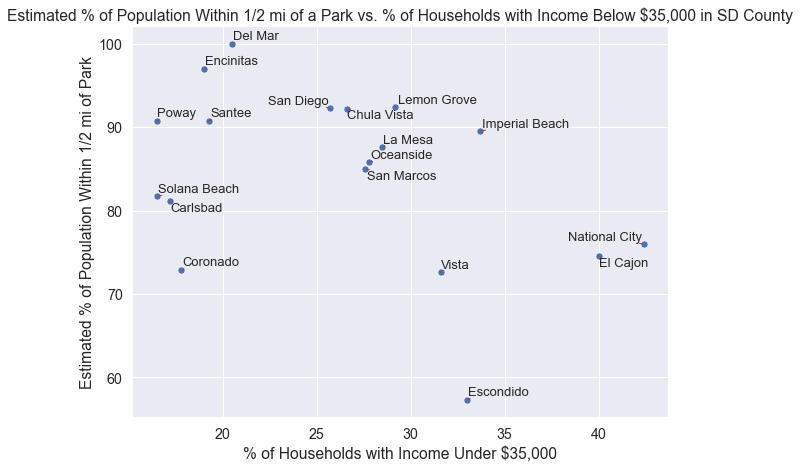

In [51]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.scatterplot(x = df_merge['Under 35,000'], y = df_merge['estimate'], s = 50)
#ax.get_legend().remove()
ax.set_title('Estimated % of Population Within 1/2 mi of a Park vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Estimated % of Population Within 1/2 mi of Park')

x = df_merge['Under 35,000']
y = df_merge['estimate']
z = df_merge['geoname']

texts = [plt.text(x[i], y[i], s = z[i], fontdict = {'size' : 13}) for i in range(len(x))]
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'tab:red'))

I created a function to determine the average 'quality' of parks in each city by multiplying the average yelp review score of each park by number of reviews, I then added up these values for each city and divided them by total number of reviews to essentially get a 'weighted' average quality. I do this as in some cities, some parks have a large number of reviews, making them likely more popular and contribute higher to the park 'quality' in the city. This similarly applies to parks with a large number of negative reviews.

In [38]:
def create_city_park_qual_df(df_review):
    park_qual_df = pd.DataFrame()
    
    city_list = []
    avg_park_qual_list = []
    num_parks_list = []
    
    for city in df_review.city.unique():
        temp_df = df_review[df_review.city == city]
        
        rating_mean = temp_df['rating'].mean()
        num_parks_list.append(len(temp_df.name.unique()))
        
        city_list.append(city)
        avg_park_qual_list.append(rating_mean)
        
    park_qual_df['geoname'] = city_list
    park_qual_df['avg_park_rev'] = avg_park_qual_list
    park_qual_df['num_parks'] = num_parks_list
    
    return park_qual_df

In [39]:
def create_city_park_qual_df(df_review):
    park_qual_df = pd.DataFrame()
    
    city_list = []
    avg_park_qual_list = []
    num_parks_list = []
    
    for city in df_review.city.unique():
        temp_df = df_review[df_review.city == city]
        
        rating_mean_total = sum(temp_df.rating * temp_df.review_count)
        review_count = temp_df.review_count.sum()
        rating_mean = rating_mean_total / review_count
        num_parks_list.append(len(temp_df.name.unique()))
        
        city_list.append(city)
        avg_park_qual_list.append(rating_mean)
        
    park_qual_df['geoname'] = city_list
    park_qual_df['avg_park_qual'] = avg_park_qual_list
    park_qual_df['num_parks'] = num_parks_list
    
    return park_qual_df

We connect our data on % of households with income under $35,000 and estimated \% of population within a half mile of a park to average review of parks in each city

In [40]:
df_park_qual = create_city_park_qual_df(df_review)

In [41]:
df_park_qual

,geoname,avg_park_qual,num_parks
0,San Diego,4.063698,602
1,Coronado,4.377688,7
2,Solana Beach,4.458678,7
3,San Marcos,4.545977,7
4,La Mesa,4.152695,13
5,Chula Vista,4.112426,14
6,Santee,3.672527,10
7,Escondido,4.045599,14
8,Poway,4.130451,12
9,El Cajon,3.855932,4


In [42]:
df_merge = df_merge.merge(df_park_qual)

In [43]:
df_merge

,geoname,"Under 35,000",estimate,avg_park_qual,num_parks
0,Carlsbad,17.2,81.127525,3.536232,6
1,Chula Vista,26.6,92.234212,4.112426,14
2,Coronado,17.8,72.903592,4.377688,7
3,Del Mar,20.5,100.000000,4.150899,11
4,El Cajon,40.0,74.548141,3.855932,4
5,Encinitas,19.0,97.032830,4.628436,10
6,Escondido,33.0,57.336131,4.045599,14
7,Imperial Beach,33.7,89.538064,4.044554,3
8,La Mesa,28.5,87.570315,4.152695,13
9,Lemon Grove,29.2,92.476303,4.000000,2


6

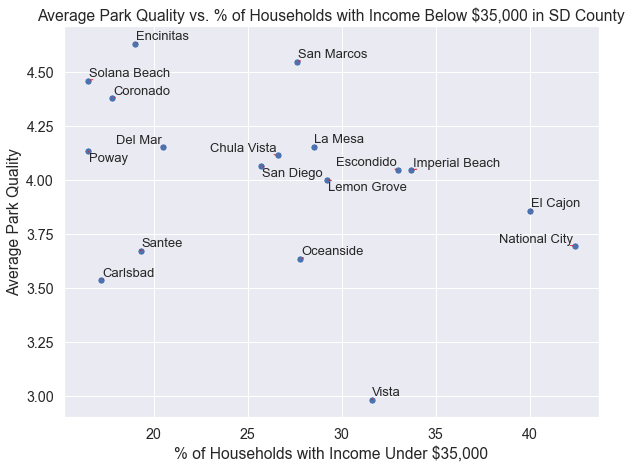

In [52]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.scatterplot(x = df_merge['Under 35,000'], y = df_merge['avg_park_qual'], s = 50)
ax.set_title('Average Park Quality vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Average Park Quality')

x = df_merge['Under 35,000']
y = df_merge['avg_park_qual']
z = df_merge['geoname']

texts = [plt.text(x[i], y[i], s = z[i], fontdict = {'size' : 13}) for i in range(len(x))]
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'tab:red'))

140

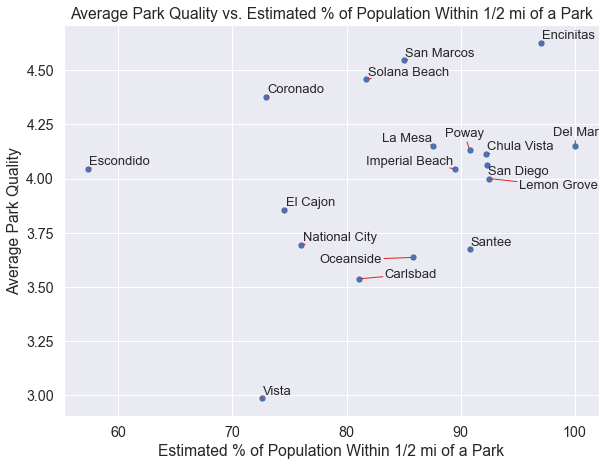

In [53]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.scatterplot(x = df_merge['estimate'], y = df_merge['avg_park_qual'], s = 50)
ax.set_title('Average Park Quality vs. Estimated % of Population Within 1/2 mi of a Park')
ax.set_xlabel('Estimated % of Population Within 1/2 mi of a Park')
ax.set_ylabel('Average Park Quality')

x = df_merge['estimate']
y = df_merge['avg_park_qual']
z = df_merge['geoname']

texts = [plt.text(x[i], y[i], s = z[i], fontdict = {'size' : 13}) for i in range(len(x))]
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'tab:red'))

We can also create linear regression plots to view the relationships between our variables:

Text(0, 0.5, 'Estimated % of Population Within 1/2 mi of a Park')

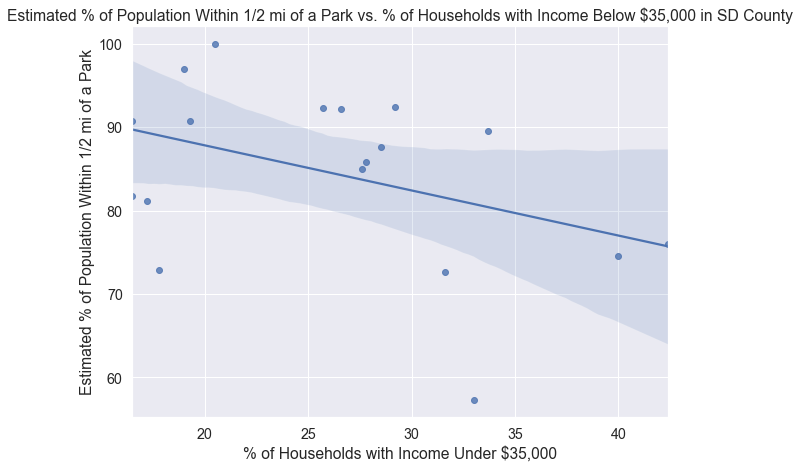

In [54]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.regplot(x = df_merge['Under 35,000'], y = df_merge['estimate'])
ax.set_title('Estimated % of Population Within 1/2 mi of a Park vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Estimated % of Population Within 1/2 mi of a Park')

The line created by the regression plot appears to show a negative correlation between percentage of households with income under $35,000 and estimated percentage of population within a 1/2 mi of a park (park accessibility).

Text(0, 0.5, 'Average Park Quality')

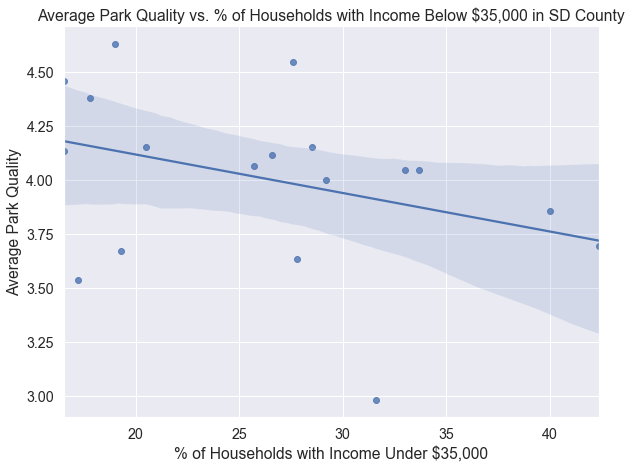

In [55]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.regplot(x = df_merge['Under 35,000'], y = df_merge['avg_park_qual'])
ax.set_title('Average Park Quality vs. % of Households with Income Below $35,000 in SD County')
ax.set_xlabel('% of Households with Income Under $35,000')
ax.set_ylabel('Average Park Quality')

The line created by the regression plot appears to show a negative correlation between percentage of households with income under $35,000 and average park quality.

Text(0, 0.5, 'Average Park Quality')

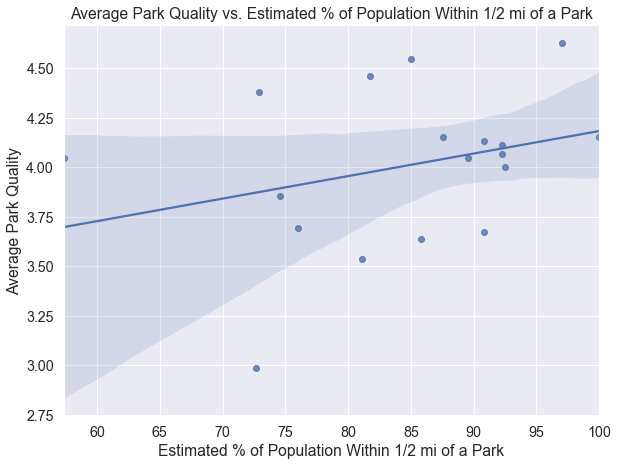

In [56]:
plt.figure(figsize = (9.6, 7.2))
sns.set(font_scale = 1.3)

ax = sns.regplot(x = df_merge['estimate'], y = df_merge['avg_park_qual'])
ax.set_title('Average Park Quality vs. Estimated % of Population Within 1/2 mi of a Park')
ax.set_xlabel('Estimated % of Population Within 1/2 mi of a Park')
ax.set_ylabel('Average Park Quality')

The line created by the regression plot appears to show a positive correlation between estimated percentage of population within a 1/2 mi of a park (park accessibility) and average park quality.

We run an OLS regression to determine the validity of our results:

In [60]:
# Suppress OLS warnings that could possibly reveal personally identifiable information
from IPython.display import HTML

HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
<a href="javascript:code_toggle_err()">Show/Hide Errors</a>.'''
)


In [62]:
df_mod = df_merge.rename(columns = {'Under 35,000' : 'under_35k'})

outcome, predictors = patsy.dmatrices('estimate ~ under_35k', df_mod)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               estimate   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     3.172
Date:                Wed, 09 Dec 2020   Prob (F-statistic):             0.0939
Time:                        05:03:35   Log-Likelihood:                -65.851
No. Observations:                  18   AIC:                             135.7
Df Residuals:                      16   BIC:                             137.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.6410      8.316     11.862      0.0

c:\users\jitar\anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [63]:
outcome, predictors = patsy.dmatrices('avg_park_qual ~ under_35k', df_mod)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_park_qual   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.272
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.151
Time:                        05:03:36   Log-Likelihood:                -7.3858
No. Observations:                  18   AIC:                             18.77
Df Residuals:                      16   BIC:                             20.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4719      0.323     13.842      0.0

c:\users\jitar\anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [64]:
outcome, predictors = patsy.dmatrices('avg_park_qual ~ estimate', df_mod)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_park_qual   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.583
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.226
Time:                        05:03:36   Log-Likelihood:                -7.7317
No. Observations:                  18   AIC:                             19.46
Df Residuals:                      16   BIC:                             21.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0441      0.769      3.957      0.0

c:\users\jitar\anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


Based on large p-values of .094, .151, and .226 respectively, we cannot reject the null hypothesis assuming an alpha of 0.05.

# Ethics & Privacy

The parks access database was pulled from California state's publicly available data portal and was provided free for use by the public. Similarly, the household income demographics dataset was pulled from a publicly available data catalog on the San Diego County's Data Portal. This data follows the San Diego's "[Open Data Policy](http://dockets.sandiego.gov/sirepub/view.aspx?cabinet=published_meetings&fileid=757846)," providing permission for anyone to freely use the publicly available data. The zip code database was also pulled free for use by the content aggregator. The Yelp database was created from publicly available information pulled from the Yelp API.

Before utilizing any dataset, I checked it for any personally identifiable information in order to alleviate any privacy concerns. As the relevant variables listed in the data information did not contain any private information, neither did the specific observations in the dataset. Additionally, each dataset was checked to make sure this analysis followed whichever open source or open use policy was defined.

A potential bias in the datasets associated with this analysis would be the size and organization of the cities listed in the dataset. City borders could have been designed to intentionally inflate or deflate the median income of the city. An unintended consequence of this would be that median income would not be a reliable factor in determining the true financial status of a community and its residents. A possible solution for addressing this issue would be to determine the source of the median income data and judge its reliability. Overall, a chance of inaccuracy in median income data is very low as the dataset would most likely be audited by San Diego County officials before being published.

Furthermore, this analysis cannot be used to generalize to the overall effects of median income on park quality in the broader world as it only deals with the unique situation of San Diego. The park quality and availability in San Diego may not correspond to other areas.


# Conclusion and Discussion

Upon completing a visualization scatter plot and linear regression of the relationships between the three variables, I noticed a negative correlation between percentage of households with income under \\$35,000 and estimated percentage of population within a 1/2 mi of a park (park accessibility) as well as percentage of households with income under \\$35,000 and park quality. Additionally, I observed a positive correlation between park accessibility and average park quality. This suggested that there was indeed a relationship between percentage of households with median household income below \\$35,000, park accessibility, and park quality within cities in San Diego County. This initially appeared to support my hypothesis predicting a similar negative correlation and positive correlation, however, upon completing an OLS regression for each relationship, I received large p-values which were greater than the assumed alpha level of .05. As a result, I failed to reject the null hypothesis.

However, this initial linear regression does possibly indicate the likelihood of a relationship between the park accessibilty and median income as well as park quality and median income. The high p-values were most likely caused by a low amount of total observations in the median income dataset. This limitation was originated from the low amount of cities surveyed for the dataset within San Diego County. I could not use other datasets which separated median income proportions by districts as these districts did not match the geonames and regions in the CA Parks Access dataset, which used different, federal census defined districts. A follow up analysis could be completed using a parks access dataset which corresponds to San Diego County districts and would provide many more final observations and more insight into the relationships between variables. Another limitation with the datasets was the large time difference between observations in the CA Parks Access dataset (2010) and the median income dataset (2016). This challenges the validity of analysis as park accessibility could have greatly changed between the 6 year gap in data. Additionally, the formula used to determine park quality has biases in that parks with an extremely large amount of reviews account for a large portion of park quality evaluation for the specific city. This can distort the real park quality situation within the city. Also, the Yelp database was not completely audited and checked to only contain park data. 

Overall, future research must be conducted with larger datasets, possibly with observations from Southern California as a whole, to definitively conclude the possibility of a relationship between percentage of households with median household income below $35,000, park accessibility, and park quality.